In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import scipy.stats as stats
import shap
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [7]:
pd.set_option('display.max_rows', None)
df = pd.read_csv("cardiac_clean16.csv")
df.head()

Prescribed_Sessions  AACVPR_Risk_Category  CR_Adherence  Triglyceride  \
0                  1.0                   0.0             1           1.0   
1                  1.0                   1.0             1           2.3   
2                  1.0                   1.0             1           1.2   
3                  1.0                   1.0             1           1.2   
4                  1.0                   0.0             1           1.2   

    HDL   LDL  HbA1c  Pre_Weight  Post_Weight  Height  ...  \
0  0.95  2.95    5.1        47.5         49.4   158.0  ...   
1  1.08  2.28    5.9       107.0        104.9   173.0  ...   
2  0.50  2.16    5.3        61.2         60.2   161.0  ...   
3  1.40  2.02    6.8        44.0         47.0   154.0  ...   
4  1.20  4.60    5.3        78.0         77.2   168.0  ...   

   Post_Tobacco_Not Abstaining  Post_Tobacco_Unknown  \
0                            0                     0   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   Pre_Exercise_Stress_Test_6MWT only  Pre_Exercise_Stress_Test_Arm Ergo  \
0                                   0                                  0   
1                                   0                                  0   
2                                   1                                  0   
3                                   0                                  0   
4                                   0                                  0   

   Pre_Exercise_Stress_Test_Treadmill  Post_Exercise_Stress_Test_6MWT only  \
0                                   1                                    0   
1                                   1                                    0   
2                                   0                                    1   
3                                   1                                    0   
4                                   1                                    0   

   Post_Exercise_Stress_Test_Arm Ergo  Post_Exercise_Stress_Test_Treadmill  \
0                                   0                                    1   
1                                   0                                    1   
2                                   0                                    0   
3                                   0                                    1   
4                                   0                                    1   

   Gender_Female  Gender_Male  
0              1            0  
1              0            1  
2              0            1  
3              0            1  
4              0            1  

[5 rows x 85 columns]

In [8]:
X = df.drop("AACVPR_Risk_Category",axis=1).copy()
X.head()

Prescribed_Sessions  CR_Adherence  Triglyceride   HDL   LDL  HbA1c  \
0                  1.0             1           1.0  0.95  2.95    5.1   
1                  1.0             1           2.3  1.08  2.28    5.9   
2                  1.0             1           1.2  0.50  2.16    5.3   
3                  1.0             1           1.2  1.40  2.02    6.8   
4                  1.0             1           1.2  1.20  4.60    5.3   

   Pre_Weight  Post_Weight  Height  Pre_Peak_Heart_Rate  ...  \
0        47.5         49.4   158.0             136.0000  ...   
1       107.0        104.9   173.0             134.4375  ...   
2        61.2         60.2   161.0             134.4375  ...   
3        44.0         47.0   154.0             134.4375  ...   
4        78.0         77.2   168.0             166.0000  ...   

   Post_Tobacco_Not Abstaining  Post_Tobacco_Unknown  \
0                            0                     0   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   Pre_Exercise_Stress_Test_6MWT only  Pre_Exercise_Stress_Test_Arm Ergo  \
0                                   0                                  0   
1                                   0                                  0   
2                                   1                                  0   
3                                   0                                  0   
4                                   0                                  0   

   Pre_Exercise_Stress_Test_Treadmill  Post_Exercise_Stress_Test_6MWT only  \
0                                   1                                    0   
1                                   1                                    0   
2                                   0                                    1   
3                                   1                                    0   
4                                   1                                    0   

   Post_Exercise_Stress_Test_Arm Ergo  Post_Exercise_Stress_Test_Treadmill  \
0                                   0                                    1   
1                                   0                                    1   
2                                   0                                    0   
3                                   0                                    1   
4                                   0                                    1   

   Gender_Female  Gender_Male  
0              1            0  
1              0            1  
2              0            1  
3              0            1  
4              0            1  

[5 rows x 84 columns]

In [9]:
#make categorical
cats = X.select_dtypes(exclude=np.number).columns.tolist()
for col in cats:
   X[col] = X[col].astype('category')

print(cats)

[]


In [10]:
X_encoded = pd.get_dummies(X, columns=cats, prefix=cats)
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 84 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Prescribed_Sessions                                  173 non-null    float64
 1   CR_Adherence                                         173 non-null    int64  
 2   Triglyceride                                         173 non-null    float64
 3   HDL                                                  173 non-null    float64
 4   LDL                                                  173 non-null    float64
 5   HbA1c                                                173 non-null    float64
 6   Pre_Weight                                           173 non-null    float64
 7   Post_Weight                                          173 non-null    float64
 8   Height                                               173 non-null    f

In [11]:
y = df["AACVPR_Risk_Category"]
print(y.head())

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: AACVPR_Risk_Category, dtype: float64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0,stratify = y)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (121, 84) (121,)
Test (52, 84) (52,)


In [13]:
rf_for_rfe = RandomForestClassifier(random_state = 0)

n = 10


rfe = RFE(estimator=rf_for_rfe, n_features_to_select=n) 
rfe.fit(X_train, y_train)


selected_features_mask = rfe.support_
feature_ranking = rfe.ranking_


selected_features = [X_train.columns[i] for i in range(len(selected_features_mask)) if selected_features_mask[i]]

# Print selected feature names
print("Selected features:", selected_features)

Selected features: ['HDL', 'LDL', 'Pre_Weight', 'Pre_Peak_Heart_Rate', 'Pre_METs', 'Age', 'Pre_BP_diastolic', 'Duration_Between_Ward_Enrollment', 'Duration_CR', 'Pre_BMI']


In [14]:
rf_for_rfe = RandomForestClassifier(random_state = 0)

n = 20


rfe1 = RFE(estimator=rf_for_rfe, n_features_to_select=n) 
rfe1.fit(X_train, y_train)


selected_features1_mask = rfe1.support_
feature_ranking1 = rfe1.ranking_


selected_features1 = [X_train.columns[i] for i in range(len(selected_features1_mask)) if selected_features1_mask[i]]

# Print selected feature names
print("Selected features1:", selected_features1)

Selected features1: ['Triglyceride', 'HDL', 'LDL', 'HbA1c', 'Pre_Weight', 'Post_Weight', 'Height', 'Pre_Peak_Heart_Rate', 'Pre_METs', 'Exercise_frequency_mins_week', 'Age', 'Pre_Left_Ventricle_EF', 'Pre_BP_systolic', 'Pre_BP_diastolic', 'CR_BP_systolic', 'CR_BP_diastolic', 'Duration_Between_Ward_Enrollment', 'Duration_CR', 'Pre_BMI', 'Post_BMI']


In [15]:
rf_for_rfe = RandomForestClassifier(random_state = 0)

n = 30


rfe2 = RFE(estimator=rf_for_rfe, n_features_to_select=n) 
rfe2.fit(X_train, y_train)


selected_features2_mask = rfe2.support_
feature_ranking2 = rfe2.ranking_


selected_features2 = [X_train.columns[i] for i in range(len(selected_features2_mask)) if selected_features2_mask[i]]

# Print selected feature names
print("Selected features2:", selected_features2)

Selected features2: ['Triglyceride', 'HDL', 'LDL', 'HbA1c', 'Pre_Weight', 'Post_Weight', 'Height', 'Pre_Peak_Heart_Rate', 'Pre_METs', 'Exercise_frequency_mins_week', 'Pre_RTW', 'Post_RTW', 'Age', 'Pre_Left_Ventricle_EF', 'Admission_Diagnosis_PCI', 'Risk_Factors_High Lipid Profile', 'Total_Risk_Factors', 'Past_CV_Unknown', 'Pre_BP_systolic', 'Pre_BP_diastolic', 'CR_BP_systolic', 'CR_BP_diastolic', 'Pre_Medication_Aspirin', 'Pre_Medication_Beta-antagonist', 'Pre_Medication_Statin', 'CR_Medication_Beta-antagonist', 'Duration_Between_Ward_Enrollment', 'Duration_CR', 'Pre_BMI', 'Post_BMI']


In [16]:
rf_for_rfe = RandomForestClassifier(random_state = 0)

n = 40


rfe3 = RFE(estimator=rf_for_rfe, n_features_to_select=n) 
rfe3.fit(X_train, y_train)


selected_features3_mask = rfe3.support_
feature_ranking3 = rfe3.ranking_


selected_features3 = [X_train.columns[i] for i in range(len(selected_features3_mask)) if selected_features3_mask[i]]

# Print selected feature names
print("Selected features3:", selected_features3)

Selected features3: ['Prescribed_Sessions', 'Triglyceride', 'HDL', 'LDL', 'HbA1c', 'Pre_Weight', 'Post_Weight', 'Height', 'Pre_Peak_Heart_Rate', 'Pre_METs', 'Exercise_frequency_mins_week', 'Pre_RTW', 'Post_RTW', 'Age', 'Pre_Left_Ventricle_EF', 'Admission_Diagnosis_CABG', 'Admission_Diagnosis_NSTEMI', 'Admission_Diagnosis_PCI', 'Risk_Factors_High Lipid Profile', 'Risk_Factors_Hypertension', 'Total_Risk_Factors', 'Past_CV_Unknown', 'Pre_BP_systolic', 'Pre_BP_diastolic', 'CR_BP_systolic', 'CR_BP_diastolic', 'Pre_Medication_Aspirin', 'Pre_Medication_Beta-antagonist', 'Pre_Medication_Statin', 'CR_Medication_ACEI/ARB', 'CR_Medication_Aspirin', 'CR_Medication_Beta-antagonist', 'Duration_Between_Ward_Enrollment', 'Duration_CR', 'Pre_BMI', 'Post_BMI', 'Race_Chinese', 'Race_Indian', 'Race_Malay', 'Pre_Tobacco_Never smoked']


In [17]:
rf_for_rfe = RandomForestClassifier(random_state = 0)

n = 50


rfe4 = RFE(estimator=rf_for_rfe, n_features_to_select=n) 
rfe4.fit(X_train, y_train)


selected_features4_mask = rfe4.support_
feature_ranking4 = rfe4.ranking_


selected_features4 = [X_train.columns[i] for i in range(len(selected_features4_mask)) if selected_features4_mask[i]]

# Print selected feature names
print("Selected features4:", selected_features4)

Selected features4: ['Prescribed_Sessions', 'Triglyceride', 'HDL', 'LDL', 'HbA1c', 'Pre_Weight', 'Post_Weight', 'Height', 'Pre_Peak_Heart_Rate', 'Pre_METs', 'Exercise_frequency_mins_week', 'Pre_RTW', 'Post_RTW', 'Post_Return_to_drive', 'Pre_erectile_dysfunction', 'Post_erectile_dysfunction', 'Age', 'Pre_Left_Ventricle_EF', 'Admission_Diagnosis_CABG', 'Admission_Diagnosis_NSTEMI', 'Admission_Diagnosis_PCI', 'Admission_Diagnosis_Valve replacement(s)', 'Risk_Factors_DM Type 2', 'Risk_Factors_High Lipid Profile', 'Risk_Factors_Hypertension', 'Total_Risk_Factors', 'Past_CV_None of the above', 'Past_CV_Prev MI', 'Past_CV_Unknown', 'Pre_BP_systolic', 'Pre_BP_diastolic', 'CR_BP_systolic', 'CR_BP_diastolic', 'Pre_Medication_Aspirin', 'Pre_Medication_Beta-antagonist', 'Pre_Medication_Statin', 'Post_Medication_ACEI/ARB', 'CR_Medication_ACEI/ARB', 'CR_Medication_Aspirin', 'CR_Medication_Beta-antagonist', 'CR_Medication_Statin*', 'Duration_Between_Ward_Enrollment', 'Duration_CR', 'Pre_BMI', 'Post_B

In [24]:
X_train_rfe = X_train[selected_features]

X_test_rfe = X_test[selected_features]

X_train_rfe.info()
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 145 to 35
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HDL                               121 non-null    float64
 1   LDL                               121 non-null    float64
 2   Pre_Weight                        121 non-null    float64
 3   Pre_Peak_Heart_Rate               121 non-null    float64
 4   Pre_METs                          121 non-null    float64
 5   Age                               121 non-null    float64
 6   Pre_BP_diastolic                  121 non-null    float64
 7   Duration_Between_Ward_Enrollment  121 non-null    float64
 8   Duration_CR                       121 non-null    float64
 9   Pre_BMI                           121 non-null    float64
dtypes: float64(10)
memory usage: 10.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 55 to 49
Data columns (total 10 co

In [25]:
X_train_rfe1 = X_train[selected_features1]

X_test_rfe1 = X_test[selected_features1]

X_train_rfe1.info()
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 145 to 35
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Triglyceride                      121 non-null    float64
 1   HDL                               121 non-null    float64
 2   LDL                               121 non-null    float64
 3   HbA1c                             121 non-null    float64
 4   Pre_Weight                        121 non-null    float64
 5   Post_Weight                       121 non-null    float64
 6   Height                            121 non-null    float64
 7   Pre_Peak_Heart_Rate               121 non-null    float64
 8   Pre_METs                          121 non-null    float64
 9   Exercise_frequency_mins_week      121 non-null    float64
 10  Age                               121 non-null    float64
 11  Pre_Left_Ventricle_EF             121 non-null    float64
 12  Pre_BP_

In [26]:
X_train_rfe2 = X_train[selected_features2]

X_test_rfe2 = X_test[selected_features2]

X_train_rfe2.info()
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 145 to 35
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Triglyceride                      121 non-null    float64
 1   HDL                               121 non-null    float64
 2   LDL                               121 non-null    float64
 3   HbA1c                             121 non-null    float64
 4   Pre_Weight                        121 non-null    float64
 5   Post_Weight                       121 non-null    float64
 6   Height                            121 non-null    float64
 7   Pre_Peak_Heart_Rate               121 non-null    float64
 8   Pre_METs                          121 non-null    float64
 9   Exercise_frequency_mins_week      121 non-null    float64
 10  Pre_RTW                           121 non-null    int64  
 11  Post_RTW                          121 non-null    int64  
 12  Age    

In [27]:
X_train_rfe3 = X_train[selected_features3]

X_test_rfe3 = X_test[selected_features3]

X_train_rfe3.info()
X_test_rfe3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 145 to 35
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Prescribed_Sessions               121 non-null    float64
 1   Triglyceride                      121 non-null    float64
 2   HDL                               121 non-null    float64
 3   LDL                               121 non-null    float64
 4   HbA1c                             121 non-null    float64
 5   Pre_Weight                        121 non-null    float64
 6   Post_Weight                       121 non-null    float64
 7   Height                            121 non-null    float64
 8   Pre_Peak_Heart_Rate               121 non-null    float64
 9   Pre_METs                          121 non-null    float64
 10  Exercise_frequency_mins_week      121 non-null    float64
 11  Pre_RTW                           121 non-null    int64  
 12  Post_RT

In [28]:
X_train_rfe4 = X_train[selected_features4]

X_test_rfe4 = X_test[selected_features4]

X_train_rfe4.info()
X_test_rfe4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 145 to 35
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prescribed_Sessions                       121 non-null    float64
 1   Triglyceride                              121 non-null    float64
 2   HDL                                       121 non-null    float64
 3   LDL                                       121 non-null    float64
 4   HbA1c                                     121 non-null    float64
 5   Pre_Weight                                121 non-null    float64
 6   Post_Weight                               121 non-null    float64
 7   Height                                    121 non-null    float64
 8   Pre_Peak_Heart_Rate                       121 non-null    float64
 9   Pre_METs                                  121 non-null    float64
 10  Exercise_frequency_mins_week         

# XGB

In [163]:
xgb_full = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    seed=0,
    eval_metric=['merror', 'mlogloss'],
    tree_method='hist'
)

# n = full
xgb_full.fit(X_train, 
            y_train,
            verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [191]:
#Make prediction
y_pred = xgb_full.predict(X_test)
y_probs = xgb_full.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.5542986425339366
Recall: 0.5373452012383901
F1 Score: 0.5426210854400634
ROC AUC Score: 0.7655443756449948


In [161]:
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    seed=0,
    eval_metric=['merror', 'mlogloss'],
    tree_method='hist'
)

# n = 10
xgb_clf.fit(X_train_rfe, 
            y_train,
            verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [162]:
#Make prediction
y_pred = xgb_clf.predict(X_test_rfe)
y_probs = xgb_clf.predict_proba(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5576923076923077
Precision: 0.5873015873015873
Recall: 0.5540505675954592
F1 Score: 0.5597200887523468
ROC AUC Score: 0.6957236842105264


In [16]:
xgb_clf1 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    seed=0,
    eval_metric=['merror', 'mlogloss'],
    tree_method='hist'
)

# n = 20
xgb_clf1.fit(X_train_rfe1, 
            y_train,
            verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [17]:
#Make prediction
y_pred = xgb_clf1.predict(X_test_rfe1)
y_probs = xgb_clf1.predict_proba(X_test_rfe1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5576923076923077
Precision: 0.572039072039072
Recall: 0.556953044375645
F1 Score: 0.5616584564860427
ROC AUC Score: 0.742453560371517


In [18]:
xgb_clf2 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    seed=0,
    eval_metric=['merror', 'mlogloss'],
    tree_method='hist'
)

# n = 30
xgb_clf2.fit(X_train_rfe2, 
            y_train,
            verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [21]:
#Make prediction
y_pred = xgb_clf2.predict(X_test_rfe2)
y_probs = xgb_clf2.predict_proba(X_test_rfe2)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.5648148148148148
Recall: 0.5373452012383901
F1 Score: 0.5455284552845528
ROC AUC Score: 0.7361648606811144


In [22]:
xgb_clf3 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    seed=0,
    eval_metric=['merror', 'mlogloss'],
    tree_method='hist'
)

# n = 40
xgb_clf3.fit(X_train_rfe3, 
            y_train,
            verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [23]:
#Make prediction
y_pred = xgb_clf3.predict(X_test_rfe3)
y_probs = xgb_clf3.predict_proba(X_test_rfe3)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.5433333333333333
Recall: 0.5156733746130031
F1 Score: 0.5211038961038961
ROC AUC Score: 0.7338751289989679


In [24]:
xgb_clf4 = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    seed=0,
    eval_metric=['merror', 'mlogloss'],
    tree_method='hist'
)

# n = 50
xgb_clf4.fit(X_train_rfe4, 
            y_train,
            verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [25]:
#Make prediction
y_pred = xgb_clf4.predict(X_test_rfe4)
y_probs = xgb_clf4.predict_proba(X_test_rfe4)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.55990675990676
Recall: 0.5156733746130031
F1 Score: 0.525
ROC AUC Score: 0.7421633126934984


# Hyperparameter tuning of XGB

In [26]:
param_distribution={'colsample_bytree': [0.4,0.6,0.8, 1.0],
                         'gamma': [0, 0.1, 0.2, 0.3,0.5,1,2,5,10],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3,0.4],
                        'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 100, 200,300,400,500],
                         'reg_alpha': [0, 0.01,0.1,1],
                         'reg_lambda': [0, 0.01,0.1,1],
                        'max_depth' : [3,4,5,6,7,8,9,10],
                         'subsample': [0.8, 0.9,1]}

In [165]:
random_search = RandomizedSearchCV(
    estimator=xgb_full, 
    param_distributions=param_distribution, 
    n_iter=1000,  
    scoring='roc_auc_ovo', 
    cv=5,  
    verbose=2, 
    random_state=0,  
    n_jobs=-1  
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=['merror', 'mlogloss'],
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=N...
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1

In [167]:
best_xgb_full = random_search.best_estimator_
best_params = random_search.best_estimator_.get_params()
best_params

best_xgb_full.fit(X_train, 
            y_train,
            verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [168]:
#Make prediction
y_pred = best_xgb_full.predict(X_test)
y_probs = best_xgb_full.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.625
Recall: 0.5299277605779154
F1 Score: 0.5420159037180313
ROC AUC Score: 0.7386158410732714


In [169]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf, 
    param_distributions=param_distribution, 
    n_iter=1000,  
    scoring='roc_auc_ovo',  
    cv=5,  
    verbose=2, 
    random_state=0,  
    n_jobs=-1  
)

random_search.fit(X_train_rfe, y_train)

best_model = random_search.best_estimator_
best_params = random_search.best_estimator_.get_params()

best_model.fit(X_train_rfe, 
            y_train,
            verbose=0)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [170]:
#Make prediction
y_pred = best_model.predict(X_test_rfe)
y_probs = best_model.predict_proba(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.4807692307692308
Precision: 0.5909090909090909
Recall: 0.479360165118679
F1 Score: 0.504481967896602
ROC AUC Score: 0.7007868937048504


In [27]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_clf1, 
    param_distributions=param_distribution, 
    n_iter=1000,  
    scoring='roc_auc_ovo', 
    cv=5,  
    verbose=2, 
    random_state=0,  
    n_jobs=-1  
)

In [28]:
random_search.fit(X_train_rfe1, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=['merror', 'mlogloss'],
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=N...
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1

In [29]:
best_model1 = random_search.best_estimator_
best_params = random_search.best_estimator_.get_params()
best_params

{'objective': 'multi:softmax',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': ['merror', 'mlogloss'],
 'feature_types': None,
 'gamma': 5,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 400,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 3,
 'seed': 0}

In [30]:
best_model1.fit(X_train_rfe1, 
            y_train,
            verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [31]:
#Make prediction
y_pred = best_model1.predict(X_test_rfe1)
y_probs = best_model1.predict_proba(X_test_rfe1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5
Precision: 0.6038647342995169
Recall: 0.4969040247678018
F1 Score: 0.5196324143692564
ROC AUC Score: 0.7283281733746131


In [32]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf2, 
    param_distributions=param_distribution, 
    n_iter=1000,  
    scoring='roc_auc_ovo',  
    cv=5,  
    verbose=2, 
    random_state=0,  
    n_jobs=-1  
)

random_search.fit(X_train_rfe2, y_train)

best_model2 = random_search.best_estimator_
best_params = random_search.best_estimator_.get_params()

best_model2.fit(X_train_rfe2, 
            y_train,
            verbose=0)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [33]:
#Make prediction
y_pred = best_model2.predict(X_test_rfe2)
y_probs = best_model2.predict_proba(X_test_rfe2)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.6053639846743295
Recall: 0.5103199174406604
F1 Score: 0.5208333333333334
ROC AUC Score: 0.7295214138286893


In [34]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf3, 
    param_distributions=param_distribution, 
    n_iter=1000,  
    scoring='roc_auc_ovo',  
    cv=5,  
    verbose=2, 
    random_state=0,  
    n_jobs=-1  
)

random_search.fit(X_train_rfe3, y_train)

best_model3 = random_search.best_estimator_
best_params = random_search.best_estimator_.get_params()

best_model3.fit(X_train_rfe3, 
            y_train,
            verbose=0)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [35]:
#Make prediction
y_pred = best_model3.predict(X_test_rfe3)
y_probs = best_model3.predict_proba(X_test_rfe3)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.4807692307692308
Precision: 0.5909090909090909
Recall: 0.479360165118679
F1 Score: 0.504481967896602
ROC AUC Score: 0.7517414860681114


In [36]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf4, 
    param_distributions=param_distribution, 
    n_iter=1000,  
    scoring='roc_auc_ovo',  
    cv=5,  
    verbose=2, 
    random_state=0,  
    n_jobs=-1  
)

random_search.fit(X_train_rfe4, y_train)

best_model4 = random_search.best_estimator_
best_params = random_search.best_estimator_.get_params()

best_model4.fit(X_train_rfe4, 
            y_train,
            verbose=0)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [37]:
#Make prediction
y_pred = best_model4.predict(X_test_rfe4)
y_probs = best_model4.predict_proba(X_test_rfe4)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.4807692307692308
Precision: 0.5909090909090909
Recall: 0.479360165118679
F1 Score: 0.504481967896602
ROC AUC Score: 0.7395833333333334


In [230]:
dump(best_model,"cardiac_xgb.joblib")

['cardiac_xgb.joblib']

In [231]:
dump(best_model1,"cardiac_xgb1.joblib")

['cardiac_xgb1.joblib']

In [232]:
dump(best_model2,"cardiac_xgb2.joblib")

['cardiac_xgb2.joblib']

In [233]:
dump(best_model3,"cardiac_xgb2.joblib")

['cardiac_xgb2.joblib']

In [234]:
dump(best_model4,"cardiac_xgb2.joblib")

['cardiac_xgb2.joblib']

# RF

In [171]:
#full feature
rf_full = RandomForestClassifier(random_state = 0)
rf_full.fit(X_train,y_train)
y_pred = rf_full.predict(X_test)
y_probs = rf_full.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5769230769230769
Precision: 0.6235431235431236
Recall: 0.571594427244582
F1 Score: 0.5788284738639349
ROC AUC Score: 0.7497097523219814


In [188]:
#n=10
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train_rfe,y_train)
y_pred = rf.predict(X_test_rfe)
y_probs = rf.predict_proba(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5
Precision: 0.5399230399230399
Recall: 0.4960655314757482
F1 Score: 0.5036621474209132
ROC AUC Score: 0.713138544891641


In [38]:
#n=20
rf1 = RandomForestClassifier(random_state = 0)

rf1.fit(X_train_rfe1,y_train)

RandomForestClassifier(random_state=0)

In [39]:
#Make prediction
y_pred = rf1.predict(X_test_rfe1)
y_probs = rf1.predict_proba(X_test_rfe1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.5738095238095239
Recall: 0.513609391124871
F1 Score: 0.5226932756102283
ROC AUC Score: 0.7379547213622292


In [40]:
rf2 = RandomForestClassifier(random_state = 0)

rf2.fit(X_train_rfe2,y_train)

RandomForestClassifier(random_state=0)

In [41]:
#Make prediction
y_pred = rf2.predict(X_test_rfe2)
y_probs = rf2.predict_proba(X_test_rfe2)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5576923076923077
Precision: 0.6044871794871794
Recall: 0.5507610939112487
F1 Score: 0.5593887593887593
ROC AUC Score: 0.7791537667698658


In [42]:
rf3 = RandomForestClassifier(random_state = 0)

rf3.fit(X_train_rfe3,y_train)

RandomForestClassifier(random_state=0)

In [43]:
#Make prediction
y_pred = rf3.predict(X_test_rfe3)
y_probs = rf3.predict_proba(X_test_rfe3)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6538461538461539
Precision: 0.685936285936286
Recall: 0.6458978328173375
F1 Score: 0.6506172839506172
ROC AUC Score: 0.7638835139318886


In [149]:
# Compute the ROC AUC for each fold using cross_val_score
roc_auc_scores = cross_val_score(rf3, X_train_rfe1, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

ROC AUC for each fold:  [0.6911169  0.67838542 0.81729497 0.69940476 0.64814815]
Mean ROC AUC:  0.7068700396825397
Standard deviation:  0.05789160932770501


In [44]:
rf4 = RandomForestClassifier(random_state = 0)

rf4.fit(X_train_rfe4,y_train)

RandomForestClassifier(random_state=0)

In [45]:
#Make prediction
y_pred = rf4.predict(X_test_rfe4)
y_probs = rf4.predict_proba(X_test_rfe4)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6346153846153846
Precision: 0.7015873015873016
Recall: 0.6250644994840041
F1 Score: 0.6336170212765958
ROC AUC Score: 0.7506611197110423


# Hyperparameter tuning RF

In [173]:
#full feature
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, verbose=2, cv=5,scoring='roc_auc_ovo')
grid_search.fit(X_train, y_train)

final_rf_full = grid_search.best_estimator_

final_rf_full.fit(X_train, 
            y_train)

#Make prediction
y_pred = final_rf_full.predict(X_test)
y_probs = final_rf_full.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1,

In [174]:
#n=10
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, verbose=2, cv=5,scoring='roc_auc_ovo')
grid_search.fit(X_train_rfe, y_train)

final_rf = grid_search.best_estimator_

final_rf.fit(X_train_rfe, 
            y_train)

#Make prediction
y_pred = final_rf.predict(X_test_rfe)
y_probs = final_rf.predict_proba(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1,

In [112]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, verbose=2, cv=5,scoring='roc_auc_ovo')
grid_search.fit(X_train_rfe1, y_train)

final_rf1 = grid_search.best_estimator_

final_rf1.fit(X_train_rfe1, 
            y_train)

#Make prediction
y_pred = final_rf1.predict(X_test_rfe1)
y_probs = final_rf1.predict_proba(X_test_rfe1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1,

In [113]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, verbose=2, cv=5,scoring='roc_auc_ovo')
grid_search.fit(X_train_rfe2, y_train)

final_rf2 = grid_search.best_estimator_

final_rf2.fit(X_train_rfe2, 
            y_train)

#Make prediction
y_pred = final_rf2.predict(X_test_rfe2)
y_probs = final_rf2.predict_proba(X_test_rfe2)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1,

In [114]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, verbose=2, cv=5,scoring='roc_auc_ovo')
grid_search.fit(X_train_rfe3, y_train)

final_rf3 = grid_search.best_estimator_

final_rf3.fit(X_train_rfe3, 
            y_train)

#Make prediction
y_pred = final_rf3.predict(X_test_rfe3)
y_probs = final_rf3.predict_proba(X_test_rfe3)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1,

In [115]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, verbose=2, cv=5,scoring='roc_auc_ovo')
grid_search.fit(X_train_rfe4, y_train)

final_rf4 = grid_search.best_estimator_

final_rf4.fit(X_train_rfe4, 
            y_train)

#Make prediction
y_pred = final_rf4.predict(X_test_rfe4)
y_probs = final_rf4.predict_proba(X_test_rfe4)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')        
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=1,

In [235]:
dump(final_rf,"cardiac_rf.joblib")

['cardiac_rf.joblib']

In [236]:
dump(final_rf1,"cardiac_rf1.joblib")

['cardiac_rf1.joblib']

In [237]:
dump(final_rf2,"cardiac_rf2.joblib")

['cardiac_rf2.joblib']

In [238]:
dump(final_rf3,"cardiac_rf3.joblib")

['cardiac_rf3.joblib']

In [239]:
dump(final_rf4,"cardiac_rf4.joblib")

['cardiac_rf4.joblib']

# SVM

In [55]:
import sklearn.metrics

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [175]:
#Full feature
scaler = StandardScaler()
X_train_scaled_full = scaler.fit_transform(X_train)
X_test_scaled_full = scaler.fit_transform(X_test)

svm_full = SVC(probability=True,random_state=0)
svm_full.fit(X_train_scaled_full,y_train)

y_pred = svm_full.predict(X_test_scaled_full)
y_probs = svm_full.predict_proba(X_test_scaled_full) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.5595238095238095
Recall: 0.5332172342621259
F1 Score: 0.5359105649428231
ROC AUC Score: 0.625515995872033


In [176]:
#n=10
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rfe)
X_test_scaled = scaler.fit_transform(X_test_rfe)

svm = SVC(probability=True,random_state=0)
svm.fit(X_train_scaled,y_train)

y_pred = svm.predict(X_test_scaled)
y_probs = svm.predict_proba(X_test_scaled) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5576923076923077
Precision: 0.5965367965367966
Recall: 0.5548890608875129
F1 Score: 0.5663663663663664
ROC AUC Score: 0.7318111455108359


In [57]:
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train_rfe1)
X_test_scaled1 = scaler.fit_transform(X_test_rfe1)

svm1 = SVC(probability=True,random_state=0)
svm1.fit(X_train_scaled1,y_train)

y_pred = svm1.predict(X_test_scaled1)
y_probs = svm1.predict_proba(X_test_scaled1) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.5
Precision: 0.5222222222222223
Recall: 0.4932275541795666
F1 Score: 0.49026169026169025
ROC AUC Score: 0.744969040247678


In [58]:
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_rfe2)
X_test_scaled2 = scaler.fit_transform(X_test_rfe2)

svm2 = SVC(probability=True,random_state=0)
svm2.fit(X_train_scaled2,y_train)

y_pred = svm2.predict(X_test_scaled2)
y_probs = svm2.predict_proba(X_test_scaled2) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.545966915532133
Recall: 0.5144478844169247
F1 Score: 0.5213403880070547
ROC AUC Score: 0.7519672342621259


In [59]:
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train_rfe3)
X_test_scaled3 = scaler.fit_transform(X_test_rfe3)

svm3 = SVC(probability=True,random_state=0)
svm3.fit(X_train_scaled3,y_train)

y_pred = svm3.predict(X_test_scaled3)
y_probs = svm3.predict_proba(X_test_scaled3) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.5466751918158568
Recall: 0.5177373581011352
F1 Score: 0.5261437908496732
ROC AUC Score: 0.7260384416924666


In [60]:
scaler = StandardScaler()
X_train_scaled4 = scaler.fit_transform(X_train_rfe4)
X_test_scaled4 = scaler.fit_transform(X_test_rfe4)

svm4 = SVC(probability=True,random_state=0)
svm4.fit(X_train_scaled4,y_train)

y_pred = svm4.predict(X_test_scaled4)
y_probs = svm4.predict_proba(X_test_scaled4) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.5682957393483709
Recall: 0.5394091847265222
F1 Score: 0.5476190476190476
ROC AUC Score: 0.681437048503612


# Hyperparameter tuning of SVM

In [177]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True,random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled_full, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, k

In [178]:
best_svm_full = grid_search.best_estimator_
y_pred = best_svm_full.predict(X_test_scaled_full)
y_probs = best_svm_full.predict_proba(X_test_scaled_full) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.5522222222222223
Recall: 0.5177373581011352
F1 Score: 0.5267857142857143
ROC AUC Score: 0.6424471104231165


In [179]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True,random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, k

In [187]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
y_probs = best_svm.predict_proba(X_test_scaled) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5576923076923077
Precision: 0.5658263305322129
Recall: 0.5561145510835913
F1 Score: 0.5594771241830064
ROC AUC Score: 0.7343588751289989


In [ ]:
dump(final_rf2,"cardiac_rf2.joblib")

In [61]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True,random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled1, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, k

In [62]:
best_svm1 = grid_search.best_estimator_
y_pred = best_svm1.predict(X_test_scaled1)
y_probs = best_svm1.predict_proba(X_test_scaled1) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.5670274170274171
Recall: 0.5361197110423116
F1 Score: 0.5430263596930264
ROC AUC Score: 0.7642866357069144


In [109]:
# Compute the ROC AUC for each fold using cross_val_score
roc_auc_scores = cross_val_score(best_svm1, X_train_scaled1, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

ROC AUC for each fold:  [0.74913194 0.79947917 0.80853175 0.77645503 0.67757937]
Mean ROC AUC:  0.7622354497354497
Standard deviation:  0.047055270446360355


In [64]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True,random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled2, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_svm2 = grid_search.best_estimator_
y_pred = best_svm2.predict(X_test_scaled2)
y_probs = best_svm2.predict_proba(X_test_scaled2) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, k

In [108]:
# Compute the ROC AUC for each fold using cross_val_score
roc_auc_scores = cross_val_score(best_svm2, X_train_scaled2, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

ROC AUC for each fold:  [0.72048611 0.83854167 0.78207672 0.72354497 0.61441799]
Mean ROC AUC:  0.735813492063492
Standard deviation:  0.07458642945374694


In [66]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True,random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled3, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_svm3 = grid_search.best_estimator_
y_pred = best_svm3.predict(X_test_scaled3)
y_probs = best_svm3.predict_proba(X_test_scaled3) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, k

In [107]:
# Compute the ROC AUC for each fold using cross_val_score
roc_auc_scores = cross_val_score(best_svm3, X_train_scaled3, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

ROC AUC for each fold:  [0.79571759 0.77864583 0.79828042 0.76554233 0.58465608]
Mean ROC AUC:  0.7445684523809524
Standard deviation:  0.08083853915862346


In [68]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True,random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled4, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_svm4 = grid_search.best_estimator_
y_pred = best_svm4.predict(X_test_scaled4)
y_probs = best_svm4.predict_proba(X_test_scaled4) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, k

In [106]:
# Compute the ROC AUC for each fold using cross_val_score
roc_auc_scores = cross_val_score(best_svm4, X_train_scaled4, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

ROC AUC for each fold:  [0.7349537  0.79166667 0.75595238 0.78472222 0.59027778]
Mean ROC AUC:  0.7315145502645503
Standard deviation:  0.07349312173311792


In [240]:
dump(best_svm,"cardiac_svm.joblib")

['cardiac_svm.joblib']

In [241]:
dump(best_svm1,"cardiac_svm1.joblib")

['cardiac_svm1.joblib']

In [242]:
dump(best_svm2,"cardiac_svm2.joblib")

['cardiac_svm2.joblib']

In [243]:
dump(best_svm3,"cardiac_svm3.joblib")

['cardiac_svm3.joblib']

In [244]:
dump(best_svm4,"cardiac_svm4.joblib")

['cardiac_svm4.joblib']

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [192]:
lr_full = LogisticRegression(max_iter=3000)
lr_full.fit(X_train_scaled_full,y_train)
y_pred = lr_full.predict(X_test_scaled_full)
y_probs = lr_full.predict_proba(X_test_scaled_full) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.4423076923076923
Precision: 0.44873294346978554
Recall: 0.4442724458204334
F1 Score: 0.44581678452646195
ROC AUC Score: 0.7005611455108358


In [193]:
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
y_probs = lr.predict_proba(X_test_scaled) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.5487912087912088
Recall: 0.5344427244582043
F1 Score: 0.5343816361613914
ROC AUC Score: 0.758062435500516


In [73]:
lr1 = LogisticRegression(max_iter=3000)
lr1.fit(X_train_scaled1,y_train)
y_pred = lr1.predict(X_test_scaled1)
y_probs = lr1.predict_proba(X_test_scaled1) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5769230769230769
Precision: 0.5984848484848485
Recall: 0.5744969040247678
F1 Score: 0.5808362369337979
ROC AUC Score: 0.7546439628482972


In [74]:
lr2 = LogisticRegression(max_iter=3000)
lr2.fit(X_train_scaled2,y_train)
y_pred = lr2.predict(X_test_scaled2)
y_probs = lr2.predict_proba(X_test_scaled2) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.5185185185185185
Recall: 0.5263802889576884
F1 Score: 0.5204481792717087
ROC AUC Score: 0.7609004127966976


In [75]:
lr3 = LogisticRegression(max_iter=3000)
lr3.fit(X_train_scaled3,y_train)
y_pred = lr3.predict(X_test_scaled3)
y_probs = lr3.predict_proba(X_test_scaled3) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5192307692307693
Precision: 0.5162037037037037
Recall: 0.5243163054695562
F1 Score: 0.5192625780861074
ROC AUC Score: 0.7157185242518059


In [76]:
lr4 = LogisticRegression(max_iter=3000)
lr4.fit(X_train_scaled4,y_train)
y_pred = lr4.predict(X_test_scaled4)
y_probs = lr4.predict_proba(X_test_scaled4) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5
Precision: 0.4953703703703704
Recall: 0.5079979360165119
F1 Score: 0.5006503830033241
ROC AUC Score: 0.7434210526315789


# Hyperparameter tuning

In [194]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled_full, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_lr_full = grid_search.best_estimator_
y_pred = best_lr_full.predict(X_test_scaled_full)
y_probs = best_lr_full.predict_proba(X_test_scaled_full) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solv

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [195]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test_scaled)
y_probs = best_lr.predict_proba(X_test_scaled) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solv

In [89]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled1, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_lr1 = grid_search.best_estimator_
y_pred = best_lr1.predict(X_test_scaled1)
y_probs = best_lr1.predict_proba(X_test_scaled1) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solv

In [104]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000,random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled2, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_lr2 = grid_search.best_estimator_
y_pred = best_lr2.predict(X_test_scaled2)
y_probs = best_lr2.predict_proba(X_test_scaled2) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solv

In [87]:
grid_search = GridSearchCV(LogisticRegression(random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled3, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_lr3 = grid_search.best_estimator_
y_pred = best_lr3.predict(X_test_scaled3)
y_probs = best_lr3.predict_proba(X_test_scaled3) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solv

In [97]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000,random_state=0), param_grid, refit=True, verbose=2, cv=5,scoring='roc_auc_ovo')

# Fit the model
grid_search.fit(X_train_scaled4, y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_lr4 = grid_search.best_estimator_
y_pred = best_lr4.predict(X_test_scaled4)
y_probs = best_lr4.predict_proba(X_test_scaled4) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solv

In [203]:

# Compute the ROC AUC for each fold using cross_val_score
roc_auc_scores = cross_val_score(best_lr4, X_train_scaled4, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

ROC AUC for each fold:  [0.72251157 0.859375   0.82705026 0.74007937 0.50462963]
Mean ROC AUC:  0.7307291666666667
Standard deviation:  0.12418007893238477


In [245]:
dump(best_lr,"cardiac_lr.joblib")

['cardiac_lr.joblib']

In [246]:
dump(best_lr1,"cardiac_lr1.joblib")

['cardiac_lr1.joblib']

In [247]:
dump(best_lr2,"cardiac_lr2.joblib")

['cardiac_lr2.joblib']

In [248]:
dump(best_lr3,"cardiac_lr3.joblib")

['cardiac_lr3.joblib']

In [249]:
dump(best_lr4,"cardiac_lr4.joblib")

['cardiac_lr4.joblib']

# CatBoost

In [116]:
import catboost
from catboost import CatBoostClassifier, Pool

In [185]:
train_data_full = Pool(data=X_train, label=y_train)
test_data_full = Pool(data=X_test)

catboost_full = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')
catboost_full.fit(train_data1)

y_pred = catboost_full.predict(test_data_full)
y_probs = catboost_full.predict_proba(test_data_full) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 1.0752414	total: 2.47ms	remaining: 2.47s
1:	learn: 1.0566529	total: 4.39ms	remaining: 2.19s
2:	learn: 1.0358554	total: 6.21ms	remaining: 2.06s
3:	learn: 1.0173121	total: 7.83ms	remaining: 1.95s
4:	learn: 1.0021770	total: 9.42ms	remaining: 1.87s
5:	learn: 0.9897478	total: 11.4ms	remaining: 1.89s
6:	learn: 0.9698033	total: 13.2ms	remaining: 1.88s
7:	learn: 0.9536106	total: 14.9ms	remaining: 1.85s
8:	learn: 0.9408035	total: 16.8ms	remaining: 1.85s
9:	learn: 0.9216165	total: 18.6ms	remaining: 1.84s
10:	learn: 0.9034694	total: 20.4ms	remaining: 1.83s
11:	learn: 0.8918541	total: 22.2ms	remaining: 1.83s
12:	learn: 0.8757617	total: 23.8ms	remaining: 1.81s
13:	learn: 0.8615010	total: 25.8ms	remaining: 1.82s
14:	learn: 0.8474656	total: 27.6ms	remaining: 1.81s
15:	learn: 0.8338452	total: 29.2ms	remaining: 1.8s
16:	learn: 0.8216873	total: 31.1ms	remaining: 1.8s
17:	learn: 0.8111062	total: 33ms	remaining: 1.8s
18:	learn: 0.8016135	total: 35ms	remaining: 1.81s
19:	learn: 0.7916405	total: 3

In [186]:
train_data = Pool(data=X_train_rfe, label=y_train)
test_data = Pool(data=X_test_rfe)

catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')
catboost.fit(train_data)

y_pred = catboost_full.predict(test_data_full)
y_probs = catboost_full.predict_proba(test_data_full) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 1.0760659	total: 1.75ms	remaining: 1.75s
1:	learn: 1.0608649	total: 3.52ms	remaining: 1.75s
2:	learn: 1.0507003	total: 5.07ms	remaining: 1.69s
3:	learn: 1.0342147	total: 6.45ms	remaining: 1.61s
4:	learn: 1.0220413	total: 7.9ms	remaining: 1.57s
5:	learn: 1.0048729	total: 9.39ms	remaining: 1.56s
6:	learn: 0.9928599	total: 10.8ms	remaining: 1.53s
7:	learn: 0.9758424	total: 12.3ms	remaining: 1.52s
8:	learn: 0.9589977	total: 13.7ms	remaining: 1.51s
9:	learn: 0.9460632	total: 15.1ms	remaining: 1.5s
10:	learn: 0.9316354	total: 16.5ms	remaining: 1.49s
11:	learn: 0.9183202	total: 18ms	remaining: 1.48s
12:	learn: 0.9040969	total: 19.3ms	remaining: 1.46s
13:	learn: 0.8934055	total: 20.8ms	remaining: 1.47s
14:	learn: 0.8797111	total: 22.3ms	remaining: 1.47s
15:	learn: 0.8657361	total: 23.5ms	remaining: 1.45s
16:	learn: 0.8554330	total: 25.2ms	remaining: 1.46s
17:	learn: 0.8411722	total: 26.7ms	remaining: 1.46s
18:	learn: 0.8309049	total: 28ms	remaining: 1.45s
19:	learn: 0.8181556	total: 

In [117]:
train_data1 = Pool(data=X_train_rfe1, label=y_train)
test_data1 = Pool(data=X_test_rfe1)

catboost1 = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')
catboost1.fit(train_data1)

y_pred = catboost1.predict(test_data1)
y_probs = catboost1.predict_proba(test_data1) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 1.0752414	total: 140ms	remaining: 2m 19s
1:	learn: 1.0566529	total: 141ms	remaining: 1m 10s
2:	learn: 1.0358554	total: 143ms	remaining: 47.5s
3:	learn: 1.0173121	total: 144ms	remaining: 36s
4:	learn: 1.0021770	total: 146ms	remaining: 29s
5:	learn: 0.9897478	total: 147ms	remaining: 24.4s
6:	learn: 0.9698033	total: 149ms	remaining: 21.1s
7:	learn: 0.9536106	total: 151ms	remaining: 18.7s
8:	learn: 0.9408035	total: 152ms	remaining: 16.7s
9:	learn: 0.9216165	total: 154ms	remaining: 15.2s
10:	learn: 0.9034694	total: 155ms	remaining: 13.9s
11:	learn: 0.8918541	total: 157ms	remaining: 12.9s
12:	learn: 0.8757617	total: 158ms	remaining: 12s
13:	learn: 0.8615010	total: 160ms	remaining: 11.2s
14:	learn: 0.8474656	total: 161ms	remaining: 10.6s
15:	learn: 0.8338452	total: 163ms	remaining: 10s
16:	learn: 0.8216873	total: 165ms	remaining: 9.52s
17:	learn: 0.8111062	total: 166ms	remaining: 9.07s
18:	learn: 0.8016135	total: 168ms	remaining: 8.66s
19:	learn: 0.7916405	total: 169ms	remaining: 8.

In [118]:
train_data2 = Pool(data=X_train_rfe2, label=y_train)
test_data2 = Pool(data=X_test_rfe2)

catboost2 = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')
catboost2.fit(train_data2)

y_pred = catboost2.predict(test_data2)
y_probs = catboost2.predict_proba(test_data2) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 1.0857237	total: 2.71ms	remaining: 2.71s
1:	learn: 1.0645226	total: 6.15ms	remaining: 3.07s
2:	learn: 1.0434859	total: 9.6ms	remaining: 3.19s
3:	learn: 1.0320412	total: 12.4ms	remaining: 3.08s
4:	learn: 1.0160526	total: 15.5ms	remaining: 3.09s
5:	learn: 0.9943909	total: 18.5ms	remaining: 3.06s
6:	learn: 0.9781600	total: 21.7ms	remaining: 3.08s
7:	learn: 0.9620823	total: 24.8ms	remaining: 3.08s
8:	learn: 0.9431953	total: 28ms	remaining: 3.08s
9:	learn: 0.9254862	total: 31ms	remaining: 3.07s
10:	learn: 0.9153900	total: 34.1ms	remaining: 3.06s
11:	learn: 0.9048695	total: 37.3ms	remaining: 3.07s
12:	learn: 0.8927927	total: 40.2ms	remaining: 3.05s
13:	learn: 0.8803912	total: 42.9ms	remaining: 3.02s
14:	learn: 0.8620979	total: 45.6ms	remaining: 3s
15:	learn: 0.8430311	total: 48.5ms	remaining: 2.98s
16:	learn: 0.8309378	total: 51.4ms	remaining: 2.97s
17:	learn: 0.8127272	total: 54ms	remaining: 2.95s
18:	learn: 0.7981930	total: 56.6ms	remaining: 2.92s
19:	learn: 0.7829290	total: 59.3

In [119]:
train_data3 = Pool(data=X_train_rfe3, label=y_train)
test_data3 = Pool(data=X_test_rfe3)

catboost3 = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')
catboost3.fit(train_data3)

y_pred = catboost3.predict(test_data3)
y_probs = catboost3.predict_proba(test_data3) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 1.0759970	total: 2.69ms	remaining: 2.69s
1:	learn: 1.0502921	total: 6.15ms	remaining: 3.07s
2:	learn: 1.0275896	total: 9.63ms	remaining: 3.2s
3:	learn: 1.0113543	total: 11ms	remaining: 2.75s
4:	learn: 0.9999372	total: 13.8ms	remaining: 2.74s
5:	learn: 0.9839101	total: 17.2ms	remaining: 2.84s
6:	learn: 0.9688804	total: 20.6ms	remaining: 2.92s
7:	learn: 0.9520380	total: 24ms	remaining: 2.97s
8:	learn: 0.9360866	total: 27ms	remaining: 2.98s
9:	learn: 0.9170859	total: 30.3ms	remaining: 3s
10:	learn: 0.9018905	total: 33.5ms	remaining: 3.01s
11:	learn: 0.8878251	total: 36.5ms	remaining: 3.01s
12:	learn: 0.8721240	total: 39.8ms	remaining: 3.02s
13:	learn: 0.8577318	total: 43.2ms	remaining: 3.04s
14:	learn: 0.8450901	total: 46.5ms	remaining: 3.05s
15:	learn: 0.8298211	total: 49.9ms	remaining: 3.07s
16:	learn: 0.8191685	total: 53.5ms	remaining: 3.09s
17:	learn: 0.8053842	total: 56.8ms	remaining: 3.1s
18:	learn: 0.7899933	total: 60.1ms	remaining: 3.1s
19:	learn: 0.7795449	total: 63.2ms

In [120]:
train_data4 = Pool(data=X_train_rfe4, label=y_train)
test_data4 = Pool(data=X_test_rfe4)

catboost4 = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')
catboost4.fit(train_data4)

y_pred = catboost4.predict(test_data4)
y_probs = catboost4.predict_proba(test_data4) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 1.0770204	total: 3.04ms	remaining: 3.04s
1:	learn: 1.0567617	total: 7.55ms	remaining: 3.77s
2:	learn: 1.0363843	total: 11.6ms	remaining: 3.86s
3:	learn: 1.0247740	total: 15.8ms	remaining: 3.94s
4:	learn: 1.0101499	total: 20.1ms	remaining: 4.01s
5:	learn: 0.9930371	total: 24.7ms	remaining: 4.09s
6:	learn: 0.9756435	total: 28.3ms	remaining: 4.01s
7:	learn: 0.9588544	total: 31.6ms	remaining: 3.92s
8:	learn: 0.9423078	total: 35.1ms	remaining: 3.87s
9:	learn: 0.9263054	total: 38.6ms	remaining: 3.82s
10:	learn: 0.9083218	total: 42.8ms	remaining: 3.85s
11:	learn: 0.8934906	total: 46.5ms	remaining: 3.83s
12:	learn: 0.8763236	total: 49.9ms	remaining: 3.79s
13:	learn: 0.8593456	total: 53.2ms	remaining: 3.75s
14:	learn: 0.8433999	total: 57ms	remaining: 3.75s
15:	learn: 0.8293468	total: 60.8ms	remaining: 3.74s
16:	learn: 0.8162290	total: 64.2ms	remaining: 3.71s
17:	learn: 0.8030004	total: 67.8ms	remaining: 3.7s
18:	learn: 0.7901388	total: 71.2ms	remaining: 3.67s
19:	learn: 0.7786915	tota

In [121]:
param_distribution_cat = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],  
    'depth': [4, 6, 8, 10],  
    'iterations': [100, 200, 300],  
    'l2_leaf_reg': [1, 3, 5, 7],   
    'border_count': [32, 64, 128], 
}

In [196]:
clf = CatBoostClassifier(loss_function='MultiClass')

random_search_cat_full = RandomizedSearchCV(estimator=clf, param_distributions=param_distribution_cat, cv=5,n_jobs=1, verbose=0, scoring = 'roc_auc_ovo')
random_search_cat_full.fit(X_train,y_train)

best_params = random_search_cat_full.best_params_
print(best_params)

0:	learn: 1.0978383	total: 50.9ms	remaining: 10.1s
1:	learn: 1.0967734	total: 109ms	remaining: 10.8s
2:	learn: 1.0954883	total: 156ms	remaining: 10.2s
3:	learn: 1.0943292	total: 206ms	remaining: 10.1s
4:	learn: 1.0932558	total: 254ms	remaining: 9.89s
5:	learn: 1.0922381	total: 305ms	remaining: 9.86s
6:	learn: 1.0902517	total: 309ms	remaining: 8.52s
7:	learn: 1.0892225	total: 364ms	remaining: 8.73s
8:	learn: 1.0884034	total: 412ms	remaining: 8.74s
9:	learn: 1.0872771	total: 461ms	remaining: 8.76s
10:	learn: 1.0863310	total: 509ms	remaining: 8.75s
11:	learn: 1.0852514	total: 569ms	remaining: 8.92s
12:	learn: 1.0843984	total: 620ms	remaining: 8.92s
13:	learn: 1.0834612	total: 671ms	remaining: 8.91s
14:	learn: 1.0823753	total: 725ms	remaining: 8.95s
15:	learn: 1.0814529	total: 783ms	remaining: 9s
16:	learn: 1.0802885	total: 844ms	remaining: 9.08s
17:	learn: 1.0793204	total: 896ms	remaining: 9.06s
18:	learn: 1.0782097	total: 965ms	remaining: 9.2s
19:	learn: 1.0773674	total: 1.06s	remaining:

In [198]:
best_cat_full = random_search_cat_full.best_estimator_
y_pred = best_cat_full.predict(X_test)
y_probs = best_cat1.predict_proba(X_test) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6346153846153846
Precision: 0.676470588235294
Recall: 0.6271284829721363
F1 Score: 0.6345125462772522
ROC AUC Score: 0.794891640866873


In [202]:
roc_auc_scores = cross_val_score(best_cat_full, X_train, y_train, cv=5, scoring='accuracy')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

0:	learn: 1.0952979	total: 4.63ms	remaining: 1.38s
1:	learn: 1.0888099	total: 9.73ms	remaining: 1.45s
2:	learn: 1.0797924	total: 14.5ms	remaining: 1.44s
3:	learn: 1.0724791	total: 18.8ms	remaining: 1.39s
4:	learn: 1.0649019	total: 24.1ms	remaining: 1.42s
5:	learn: 1.0556615	total: 28.8ms	remaining: 1.41s
6:	learn: 1.0482295	total: 33.7ms	remaining: 1.41s
7:	learn: 1.0420103	total: 38.5ms	remaining: 1.41s
8:	learn: 1.0333757	total: 44.1ms	remaining: 1.43s
9:	learn: 1.0229267	total: 51.4ms	remaining: 1.49s
10:	learn: 1.0163975	total: 56.5ms	remaining: 1.48s
11:	learn: 1.0094876	total: 61.8ms	remaining: 1.48s
12:	learn: 1.0030960	total: 66ms	remaining: 1.46s
13:	learn: 0.9973735	total: 70.5ms	remaining: 1.44s
14:	learn: 0.9902057	total: 74.7ms	remaining: 1.42s
15:	learn: 0.9822519	total: 78.9ms	remaining: 1.4s
16:	learn: 0.9769832	total: 83.4ms	remaining: 1.39s
17:	learn: 0.9714429	total: 87.8ms	remaining: 1.38s
18:	learn: 0.9655174	total: 92.5ms	remaining: 1.37s
19:	learn: 0.9592745	tota

In [199]:
clf = CatBoostClassifier(loss_function='MultiClass')

random_search_cat = RandomizedSearchCV(estimator=clf, param_distributions=param_distribution_cat, cv=5,n_jobs=1, verbose=0, scoring = 'roc_auc_ovo')
random_search_cat.fit(X_train_rfe,y_train)

best_params = random_search_cat.best_params_
print(best_params)

0:	learn: 1.0744132	total: 732us	remaining: 146ms
1:	learn: 1.0529503	total: 1.82ms	remaining: 180ms
2:	learn: 1.0458667	total: 2.88ms	remaining: 189ms
3:	learn: 1.0322607	total: 3.69ms	remaining: 181ms
4:	learn: 1.0199308	total: 4.21ms	remaining: 164ms
5:	learn: 1.0043033	total: 4.8ms	remaining: 155ms
6:	learn: 0.9909944	total: 5.38ms	remaining: 148ms
7:	learn: 0.9816129	total: 5.99ms	remaining: 144ms
8:	learn: 0.9737611	total: 6.56ms	remaining: 139ms
9:	learn: 0.9647099	total: 7.57ms	remaining: 144ms
10:	learn: 0.9503643	total: 8.24ms	remaining: 142ms
11:	learn: 0.9383717	total: 9ms	remaining: 141ms
12:	learn: 0.9224391	total: 9.56ms	remaining: 138ms
13:	learn: 0.9182674	total: 10.1ms	remaining: 134ms
14:	learn: 0.9103365	total: 10.8ms	remaining: 133ms
15:	learn: 0.8987598	total: 11.4ms	remaining: 131ms
16:	learn: 0.8933645	total: 12ms	remaining: 129ms
17:	learn: 0.8817733	total: 12.8ms	remaining: 129ms
18:	learn: 0.8702009	total: 13.4ms	remaining: 128ms
19:	learn: 0.8609764	total: 1

In [200]:
best_cat = random_search_cat.best_estimator_
y_pred = best_cat.predict(X_test_rfe)
y_probs = best_cat.predict_proba(X_test_rfe) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5384615384615384
Precision: 0.5825717492384159
Recall: 0.5344427244582043
F1 Score: 0.5428462590687929
ROC AUC Score: 0.7375838493292054


In [129]:
clf = CatBoostClassifier(loss_function='MultiClass')

random_search_cat1 = RandomizedSearchCV(estimator=clf, param_distributions=param_distribution_cat, cv=5,n_jobs=1, verbose=0, scoring = 'roc_auc_ovo')
random_search_cat1.fit(X_train_rfe1,y_train)

best_params = random_search_cat1.best_params_
print(best_params)


0:	learn: 1.0928100	total: 4.36ms	remaining: 432ms
1:	learn: 1.0869333	total: 8.98ms	remaining: 440ms
2:	learn: 1.0805730	total: 13.1ms	remaining: 424ms
3:	learn: 1.0749214	total: 17.3ms	remaining: 416ms
4:	learn: 1.0702491	total: 21.5ms	remaining: 409ms
5:	learn: 1.0659525	total: 26.4ms	remaining: 414ms
6:	learn: 1.0605217	total: 31.2ms	remaining: 414ms
7:	learn: 1.0558417	total: 36.5ms	remaining: 420ms
8:	learn: 1.0518991	total: 42.9ms	remaining: 434ms
9:	learn: 1.0466619	total: 47.1ms	remaining: 424ms
10:	learn: 1.0413308	total: 51.1ms	remaining: 413ms
11:	learn: 1.0365487	total: 55.1ms	remaining: 404ms
12:	learn: 1.0313678	total: 58.8ms	remaining: 394ms
13:	learn: 1.0267269	total: 62.6ms	remaining: 384ms
14:	learn: 1.0217014	total: 66.3ms	remaining: 376ms
15:	learn: 1.0152387	total: 70.1ms	remaining: 368ms
16:	learn: 1.0107011	total: 73.8ms	remaining: 360ms
17:	learn: 1.0053030	total: 77.4ms	remaining: 353ms
18:	learn: 0.9993919	total: 81ms	remaining: 345ms
19:	learn: 0.9946721	tot

In [136]:
best_cat1 = random_search_cat1.best_estimator_
y_pred = best_cat1.predict(X_test_rfe1)
y_probs = best_cat1.predict_proba(X_test_rfe1) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5576923076923077
Precision: 0.5932551319648094
Recall: 0.5466331269349846
F1 Score: 0.5393406593406592
ROC AUC Score: 0.794891640866873


In [137]:
roc_auc_scores = cross_val_score(best_cat1, X_train_rfe1, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

0:	learn: 1.0959435	total: 971us	remaining: 96.1ms
1:	learn: 1.0914677	total: 1.82ms	remaining: 89.3ms
2:	learn: 1.0882068	total: 2.41ms	remaining: 78.1ms
3:	learn: 1.0853928	total: 2.99ms	remaining: 71.8ms
4:	learn: 1.0811363	total: 3.54ms	remaining: 67.3ms
5:	learn: 1.0792228	total: 4.13ms	remaining: 64.7ms
6:	learn: 1.0761828	total: 4.75ms	remaining: 63.1ms
7:	learn: 1.0746434	total: 5.35ms	remaining: 61.5ms
8:	learn: 1.0701717	total: 5.91ms	remaining: 59.7ms
9:	learn: 1.0677189	total: 6.47ms	remaining: 58.2ms
10:	learn: 1.0650679	total: 7.06ms	remaining: 57.1ms
11:	learn: 1.0617536	total: 7.8ms	remaining: 57.2ms
12:	learn: 1.0601655	total: 8.41ms	remaining: 56.3ms
13:	learn: 1.0563069	total: 9ms	remaining: 55.3ms
14:	learn: 1.0537383	total: 9.59ms	remaining: 54.4ms
15:	learn: 1.0507090	total: 10.2ms	remaining: 53.7ms
16:	learn: 1.0476672	total: 10.8ms	remaining: 52.9ms
17:	learn: 1.0441722	total: 11.5ms	remaining: 52.4ms
18:	learn: 1.0403751	total: 12.1ms	remaining: 51.7ms
19:	lear

In [130]:
clf = CatBoostClassifier(loss_function='MultiClass')

random_search_cat2 = RandomizedSearchCV(estimator=clf, param_distributions=param_distribution_cat, cv=5,n_jobs=1, verbose=0, scoring = 'roc_auc_ovo')
random_search_cat2.fit(X_train_rfe2,y_train)

best_params2 = random_search_cat2.best_params_
print(best_params2)

best_cat2 = random_search_cat2.best_estimator_
y_pred = best_cat2.predict(X_test_rfe2)
y_probs = best_cat2.predict_proba(X_test_rfe2) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 1.0147185	total: 2.4ms	remaining: 238ms
1:	learn: 0.9381450	total: 4.97ms	remaining: 244ms
2:	learn: 0.8333328	total: 7.18ms	remaining: 232ms
3:	learn: 0.7790976	total: 9.58ms	remaining: 230ms
4:	learn: 0.7244581	total: 11.7ms	remaining: 222ms
5:	learn: 0.6824235	total: 13.9ms	remaining: 217ms
6:	learn: 0.6291665	total: 16.4ms	remaining: 217ms
7:	learn: 0.5858222	total: 19.3ms	remaining: 222ms
8:	learn: 0.5425956	total: 22ms	remaining: 223ms
9:	learn: 0.4938419	total: 24.7ms	remaining: 222ms
10:	learn: 0.4634457	total: 26.9ms	remaining: 217ms
11:	learn: 0.4300734	total: 29ms	remaining: 213ms
12:	learn: 0.3959107	total: 31ms	remaining: 208ms
13:	learn: 0.3675448	total: 33.2ms	remaining: 204ms
14:	learn: 0.3357607	total: 35.3ms	remaining: 200ms
15:	learn: 0.3176905	total: 37.5ms	remaining: 197ms
16:	learn: 0.2916442	total: 39.6ms	remaining: 193ms
17:	learn: 0.2719979	total: 41.8ms	remaining: 191ms
18:	learn: 0.2552813	total: 44ms	remaining: 188ms
19:	learn: 0.2420112	total: 46m

In [131]:
roc_auc_scores = cross_val_score(best_cat2, X_train_rfe2, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

0:	learn: 1.0969293	total: 994us	remaining: 98.4ms
1:	learn: 1.0942730	total: 1.88ms	remaining: 92ms
2:	learn: 1.0924641	total: 2.57ms	remaining: 83.1ms
3:	learn: 1.0885915	total: 3.25ms	remaining: 78ms
4:	learn: 1.0866812	total: 3.9ms	remaining: 74.2ms
5:	learn: 1.0847698	total: 4.63ms	remaining: 72.5ms
6:	learn: 1.0839476	total: 5.3ms	remaining: 70.4ms
7:	learn: 1.0804936	total: 6.08ms	remaining: 69.9ms
8:	learn: 1.0791912	total: 6.76ms	remaining: 68.4ms
9:	learn: 1.0765431	total: 7.54ms	remaining: 67.9ms
10:	learn: 1.0753771	total: 8.28ms	remaining: 67ms
11:	learn: 1.0731630	total: 8.96ms	remaining: 65.7ms
12:	learn: 1.0700187	total: 9.71ms	remaining: 65ms
13:	learn: 1.0678515	total: 10.4ms	remaining: 64ms
14:	learn: 1.0656982	total: 11.1ms	remaining: 63.2ms
15:	learn: 1.0639441	total: 11.9ms	remaining: 62.4ms
16:	learn: 1.0622642	total: 12.7ms	remaining: 61.8ms
17:	learn: 1.0608576	total: 13.5ms	remaining: 61.3ms
18:	learn: 1.0585031	total: 14.2ms	remaining: 60.6ms
19:	learn: 1.055

In [204]:
clf = CatBoostClassifier(loss_function='MultiClass')

random_search_cat3 = RandomizedSearchCV(estimator=clf, param_distributions=param_distribution_cat, cv=5,n_jobs=1, verbose=0, scoring = 'roc_auc_ovo')
random_search_cat3.fit(X_train_rfe3,y_train)

best_params3 = random_search_cat3.best_params_
print(best_params3)

best_cat3 = random_search_cat3.best_estimator_
y_pred = best_cat3.predict(X_test_rfe3)
y_probs = best_cat3.predict_proba(X_test_rfe3) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 0.9866948	total: 2.91ms	remaining: 580ms
1:	learn: 0.8672173	total: 5.78ms	remaining: 573ms
2:	learn: 0.8001696	total: 8.77ms	remaining: 576ms
3:	learn: 0.7486497	total: 10ms	remaining: 490ms
4:	learn: 0.7079387	total: 13.1ms	remaining: 512ms
5:	learn: 0.6612272	total: 16.3ms	remaining: 528ms
6:	learn: 0.6108749	total: 19.2ms	remaining: 529ms
7:	learn: 0.5822092	total: 22.2ms	remaining: 534ms
8:	learn: 0.5461170	total: 25.2ms	remaining: 536ms
9:	learn: 0.5076119	total: 28.1ms	remaining: 534ms
10:	learn: 0.4713935	total: 31.4ms	remaining: 540ms
11:	learn: 0.4447742	total: 34.8ms	remaining: 546ms
12:	learn: 0.4181859	total: 38.7ms	remaining: 557ms
13:	learn: 0.3809252	total: 43.2ms	remaining: 574ms
14:	learn: 0.3521483	total: 48.3ms	remaining: 596ms
15:	learn: 0.3227031	total: 52ms	remaining: 598ms
16:	learn: 0.3060619	total: 54.8ms	remaining: 590ms
17:	learn: 0.2870914	total: 57.6ms	remaining: 582ms
18:	learn: 0.2717310	total: 60.5ms	remaining: 576ms
19:	learn: 0.2617280	total

In [133]:
roc_auc_scores = cross_val_score(best_cat3, X_train_rfe3, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

0:	learn: 1.0972529	total: 1.47ms	remaining: 146ms
1:	learn: 1.0948281	total: 3.33ms	remaining: 163ms
2:	learn: 1.0922048	total: 4.8ms	remaining: 155ms
3:	learn: 1.0912513	total: 6.22ms	remaining: 149ms
4:	learn: 1.0892069	total: 7.66ms	remaining: 146ms
5:	learn: 1.0879723	total: 9.15ms	remaining: 143ms
6:	learn: 1.0852624	total: 10.6ms	remaining: 141ms
7:	learn: 1.0831856	total: 12.1ms	remaining: 139ms
8:	learn: 1.0803242	total: 13.5ms	remaining: 137ms
9:	learn: 1.0782015	total: 14.9ms	remaining: 134ms
10:	learn: 1.0764702	total: 16.4ms	remaining: 133ms
11:	learn: 1.0743881	total: 17.9ms	remaining: 131ms
12:	learn: 1.0710611	total: 19.3ms	remaining: 129ms
13:	learn: 1.0687975	total: 20.7ms	remaining: 127ms
14:	learn: 1.0671465	total: 22.1ms	remaining: 125ms
15:	learn: 1.0659582	total: 23.5ms	remaining: 123ms
16:	learn: 1.0635865	total: 24.8ms	remaining: 121ms
17:	learn: 1.0617478	total: 26ms	remaining: 118ms
18:	learn: 1.0599194	total: 27.2ms	remaining: 116ms
19:	learn: 1.0591482	tota

In [134]:
clf = CatBoostClassifier(loss_function='MultiClass')

random_search_cat4 = RandomizedSearchCV(estimator=clf, param_distributions=param_distribution_cat, cv=5,n_jobs=1, verbose=0, scoring = 'roc_auc_ovo')
random_search_cat4.fit(X_train_rfe4,y_train)

best_params4 = random_search_cat4.best_params_
print(best_params4)

best_cat4 = random_search_cat4.best_estimator_
y_pred = best_cat4.predict(X_test_rfe4)
y_probs = best_cat4.predict_proba(X_test_rfe4) 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovo', average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("ROC AUC Score:", roc_auc)

0:	learn: 1.0797363	total: 11.9ms	remaining: 1.18s
1:	learn: 1.0555473	total: 22.5ms	remaining: 1.1s
2:	learn: 1.0332833	total: 28.6ms	remaining: 924ms
3:	learn: 1.0096165	total: 41.1ms	remaining: 987ms
4:	learn: 0.9936274	total: 51.8ms	remaining: 984ms
5:	learn: 0.9725881	total: 62.9ms	remaining: 986ms
6:	learn: 0.9543569	total: 74.4ms	remaining: 989ms
7:	learn: 0.9354279	total: 86.3ms	remaining: 993ms
8:	learn: 0.9180639	total: 97.1ms	remaining: 981ms
9:	learn: 0.9132087	total: 97.8ms	remaining: 880ms
10:	learn: 0.8963201	total: 109ms	remaining: 884ms
11:	learn: 0.8817455	total: 119ms	remaining: 874ms
12:	learn: 0.8640626	total: 129ms	remaining: 861ms
13:	learn: 0.8508142	total: 139ms	remaining: 855ms
14:	learn: 0.8342783	total: 149ms	remaining: 845ms
15:	learn: 0.8169496	total: 159ms	remaining: 834ms
16:	learn: 0.8032897	total: 168ms	remaining: 821ms
17:	learn: 0.7857795	total: 178ms	remaining: 813ms
18:	learn: 0.7716106	total: 190ms	remaining: 810ms
19:	learn: 0.7576785	total: 201m

In [135]:
roc_auc_scores = cross_val_score(best_cat4, X_train_rfe4, y_train, cv=5, scoring='roc_auc_ovo')

# Print the ROC AUC for each fold
print("ROC AUC for each fold: ", roc_auc_scores)

# Print the mean ROC AUC and standard deviation
print("Mean ROC AUC: ", roc_auc_scores.mean())
print("Standard deviation: ", roc_auc_scores.std())

0:	learn: 1.0905926	total: 9.53ms	remaining: 943ms
1:	learn: 1.0804967	total: 20.8ms	remaining: 1.02s
2:	learn: 1.0682163	total: 26.4ms	remaining: 853ms
3:	learn: 1.0562724	total: 36.4ms	remaining: 874ms
4:	learn: 1.0463029	total: 46.5ms	remaining: 884ms
5:	learn: 1.0352928	total: 57.5ms	remaining: 901ms
6:	learn: 1.0264640	total: 68.3ms	remaining: 907ms
7:	learn: 1.0154148	total: 78.3ms	remaining: 900ms
8:	learn: 1.0067531	total: 88.7ms	remaining: 897ms
9:	learn: 1.0019020	total: 89.4ms	remaining: 805ms
10:	learn: 0.9920184	total: 98.8ms	remaining: 800ms
11:	learn: 0.9836809	total: 109ms	remaining: 798ms
12:	learn: 0.9745647	total: 119ms	remaining: 796ms
13:	learn: 0.9652424	total: 130ms	remaining: 796ms
14:	learn: 0.9557221	total: 140ms	remaining: 791ms
15:	learn: 0.9420733	total: 151ms	remaining: 792ms
16:	learn: 0.9348568	total: 162ms	remaining: 791ms
17:	learn: 0.9249391	total: 174ms	remaining: 792ms
18:	learn: 0.9167665	total: 186ms	remaining: 793ms
19:	learn: 0.9086698	total: 19

In [211]:
# Get feature importance
catboost_importances = best_cat3.get_feature_importance()
indices = np.argsort(catboost_importances)[::-1]
feature_names = X_train_rfe3.columns.tolist()
sorted_feature_names = [feature_names[i] for i in indices]
sorted_feature_names

['Pre_METs',
 'Pre_Left_Ventricle_EF',
 'Age',
 'HDL',
 'Duration_Between_Ward_Enrollment',
 'HbA1c',
 'Pre_BP_diastolic',
 'Duration_CR',
 'Pre_Weight',
 'Post_BMI',
 'LDL',
 'Pre_BMI',
 'Height',
 'CR_BP_diastolic',
 'Triglyceride',
 'Pre_Medication_Beta-antagonist',
 'Post_Weight',
 'Pre_Peak_Heart_Rate',
 'Exercise_frequency_mins_week',
 'Pre_BP_systolic',
 'Past_CV_Unknown',
 'CR_BP_systolic',
 'Post_RTW',
 'Pre_Medication_Statin',
 'Pre_Medication_Aspirin',
 'CR_Medication_Aspirin',
 'Total_Risk_Factors',
 'Admission_Diagnosis_PCI',
 'Admission_Diagnosis_NSTEMI',
 'Pre_RTW',
 'CR_Medication_Beta-antagonist',
 'Race_Malay',
 'Prescribed_Sessions',
 'Pre_Tobacco_Never smoked',
 'Risk_Factors_High Lipid Profile',
 'Race_Indian',
 'Risk_Factors_Hypertension',
 'Admission_Diagnosis_CABG',
 'CR_Medication_ACEI/ARB',
 'Race_Chinese']

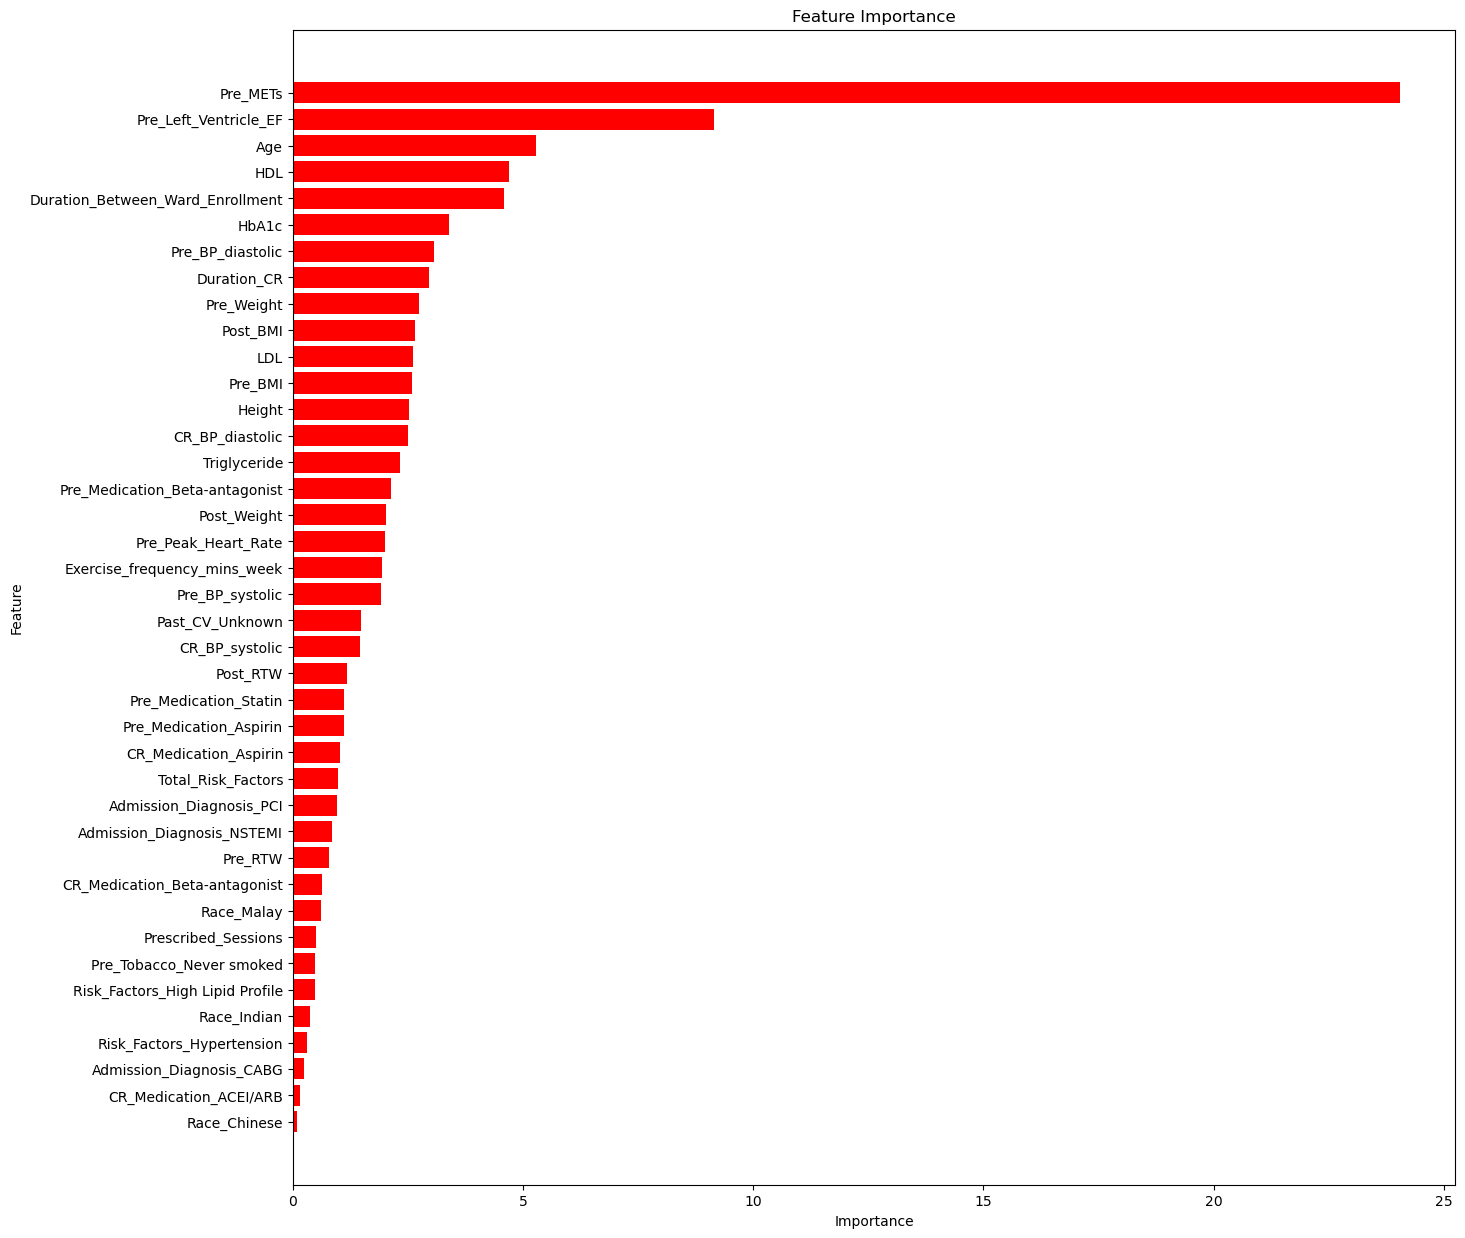

In [219]:
plt.figure(figsize=(15, 15))
plt.title("Feature Importance")

# Use barh for a horizontal bar chart and adjust the alignment
plt.barh(range(len(catboost_importances)), catboost_importances[indices], color="r", align="center")

# Adjust the y-axis to display the sorted feature names
sorted_feature_names = [feature_names[i] for i in indices]
plt.yticks(range(len(catboost_importances)), sorted_feature_names)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

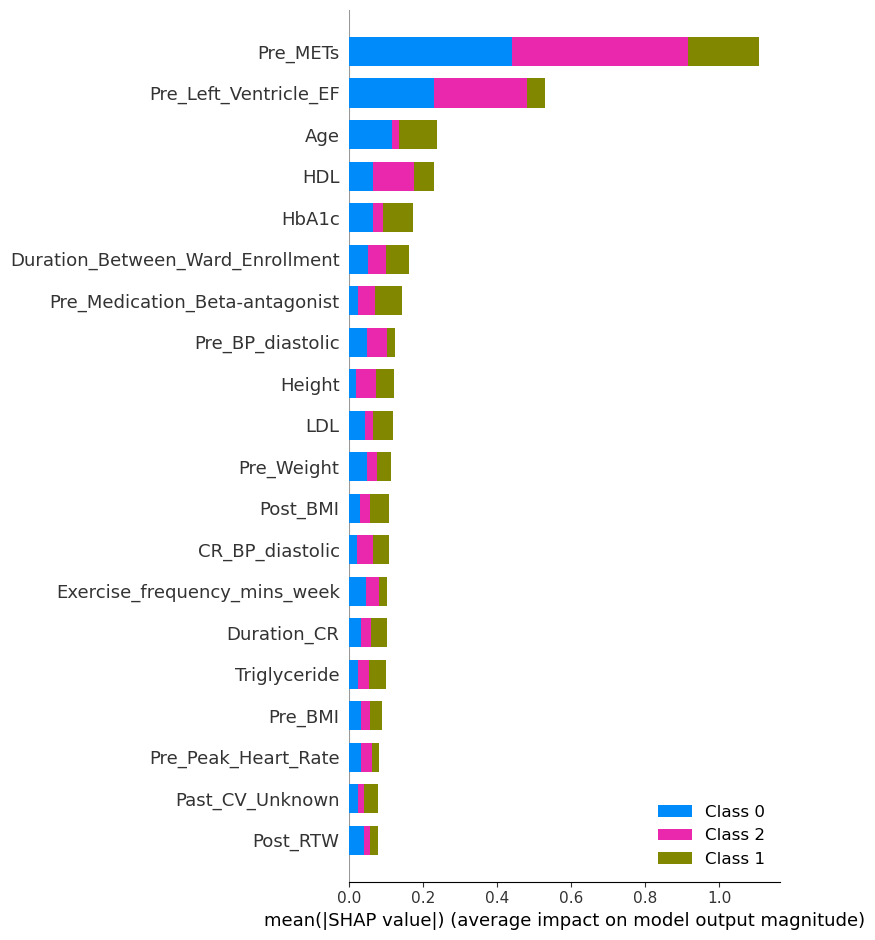

In [21]:
import shap

explainer = shap.Explainer(best_cat3)
shap_values = explainer.shap_values(X_train_rfe3)
shap.summary_plot(shap_values, X_train_rfe3)

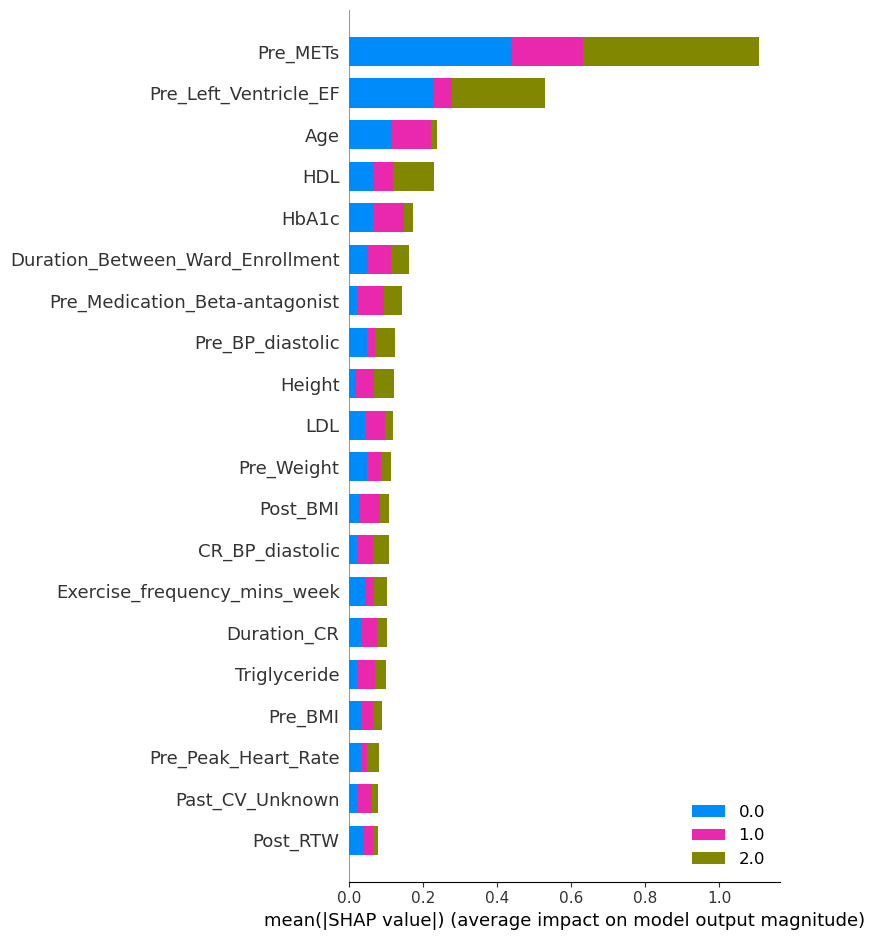

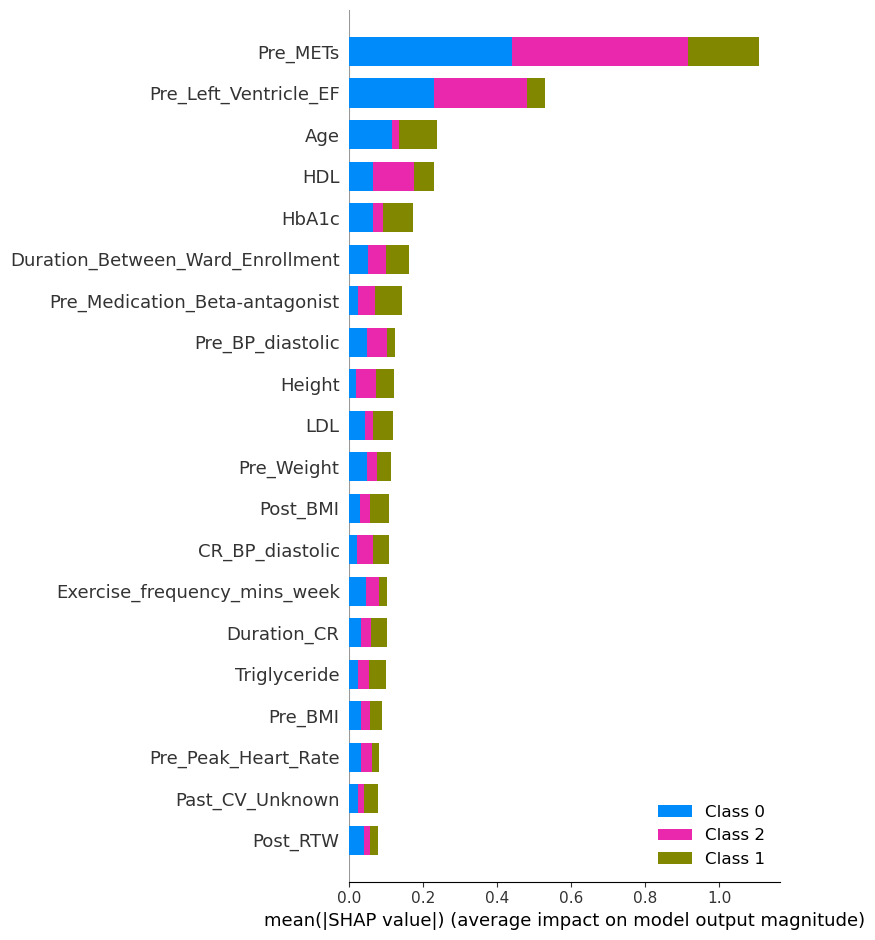

In [24]:
shap.summary_plot(shap_values, X_test_rfe3, class_inds="original", class_names=best_cat3.classes_)
shap.summary_plot(shap_values, X_train_rfe3)

In [22]:
# Get feature importance
rfe_importances = rfe3.get_feature_importance()
indices = np.argsort(rfe_importances)[::-1]
feature_names = X_train_rfe3.columns.tolist()
sorted_feature_names = [feature_names[i] for i in indices]
sorted_feature_names

AttributeError: 'RFE' object has no attribute 'get_feature_importance'

In [226]:
#confusion matrix
y_pred = best_cat3.predict(X_test_rfe3)
print(confusion_matrix(y_test, y_pred))

[[14  4  1]
 [ 9  8  0]
 [ 2  5  9]]


In [227]:
## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = best_cat3.predict(X_test_rfe3)
y_prob = best_cat3.predict_proba(X_test_rfe3)  

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='macro')))
print('Macro AUC: {:.2f}\n'.format(roc_auc_score(y_test, y_prob, average='macro',multi_class='ovo')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('Weighted AUC: {:.2f}'.format(roc_auc_score(y_test, y_prob, average='weighted',multi_class='ovo')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') 


------------------ Confusion Matrix -----------------

[[14  4  1]
 [ 9  8  0]
 [ 2  5  9]]

Accuracy: 0.60
Balanced Accuracy: 0.59

Micro Precision: 0.60
Micro Recall: 0.60
Micro F1-score: 0.60

Macro Precision: 0.64
Macro Recall: 0.59
Macro F1-score: 0.60
Macro AUC: 0.80

Weighted Precision: 0.64
Weighted Recall: 0.60
Weighted F1-score: 0.60
Weighted AUC: 0.80

--------------- Classification Report ---------------

              precision    recall  f1-score   support

         0.0       0.56      0.74      0.64        19
         1.0       0.47      0.47      0.47        17
         2.0       0.90      0.56      0.69        16

    accuracy                           0.60        52
   macro avg       0.64      0.59      0.60        52
weighted avg       0.64      0.60      0.60        52

---------------------- XGBoost ----------------------


In [250]:
dump(best_cat,"cardiac_cat.joblib")

['cardiac_cat.joblib']

In [251]:
dump(best_cat1,"cardiac_cat1.joblib")

['cardiac_cat1.joblib']

In [252]:
dump(best_cat2,"cardiac_cat2.joblib")

['cardiac_cat2.joblib']

In [253]:
dump(best_cat3,"cardiac_cat3.joblib")

['cardiac_cat3.joblib']

In [254]:
dump(best_cat4,"cardiac_cat4.joblib")

['cardiac_cat4.joblib']

In [2]:
best_cat3 = load('cardiac_cat3.joblib')

In [3]:
best_cat1 = load('cardiac_cat1.joblib')

In [4]:
best_cat2 = load('cardiac_cat2.joblib')

In [19]:
best_cat4 = load('cardiac_cat4.joblib')

In [20]:
best_cat = load('cardiac_cat.joblib')

In [21]:
#confusion matrix
y_pred = best_cat.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[13  6  0]
 [11  5  1]
 [ 3  3 10]]


In [34]:
#confusion matrix
y_pred = best_cat.predict(X_test_rfe)
print(confusion_matrix(y_test, y_pred))

[[13  6  0]
 [11  5  1]
 [ 3  3 10]]


In [35]:
#confusion matrix
y_pred = best_cat1.predict(X_test_rfe1)
print(confusion_matrix(y_test, y_pred))

[[16  2  1]
 [13  4  0]
 [ 2  5  9]]


In [36]:
#confusion matrix
y_pred = best_cat2.predict(X_test_rfe2)
print(confusion_matrix(y_test, y_pred))

[[15  3  1]
 [11  6  0]
 [ 2  5  9]]


In [37]:
#confusion matrix
y_pred = best_cat3.predict(X_test_rfe3)
print(confusion_matrix(y_test, y_pred))

[[14  4  1]
 [ 9  8  0]
 [ 2  5  9]]


In [38]:
#confusion matrix
y_pred = best_cat4.predict(X_test_rfe4)
print(confusion_matrix(y_test, y_pred))

[[16  2  1]
 [12  5  0]
 [ 2  6  8]]
